In [1]:
import pandas as pd

# Load the AFL match data into a pandas DataFrame
afl_data = pd.read_csv('/content/fryziggafl.csv')

# Check the first few rows of the DataFrame to understand its structure
print(afl_data.head())


   Unnamed: 0    venue_name  match_id match_home_team match_away_team  \
0           1  Brunswick St         1         Fitzroy         Carlton   
1           2  Brunswick St         1         Fitzroy         Carlton   
2           3  Brunswick St         1         Fitzroy         Carlton   
3           4  Brunswick St         1         Fitzroy         Carlton   
4           5  Brunswick St         1         Fitzroy         Carlton   

   match_date match_local_time  match_attendance match_round  \
0  1897-05-08         15:00:00              3000           1   
1  1897-05-08         15:00:00              3000           1   
2  1897-05-08         15:00:00              3000           1   
3  1897-05-08         15:00:00              3000           1   
4  1897-05-08         15:00:00              3000           1   

   match_home_team_goals  ...  intercept_marks  marks_on_lead  pressure_acts  \
0                      6  ...              NaN            NaN            NaN   
1               

In [2]:
import numpy as np

# Create a new column 'result' indicating match outcome (1 for away team win, 0 for draw, -1 for away team loss)
afl_data['result'] = np.sign(afl_data['match_away_team_score'] - afl_data['match_home_team_score'])


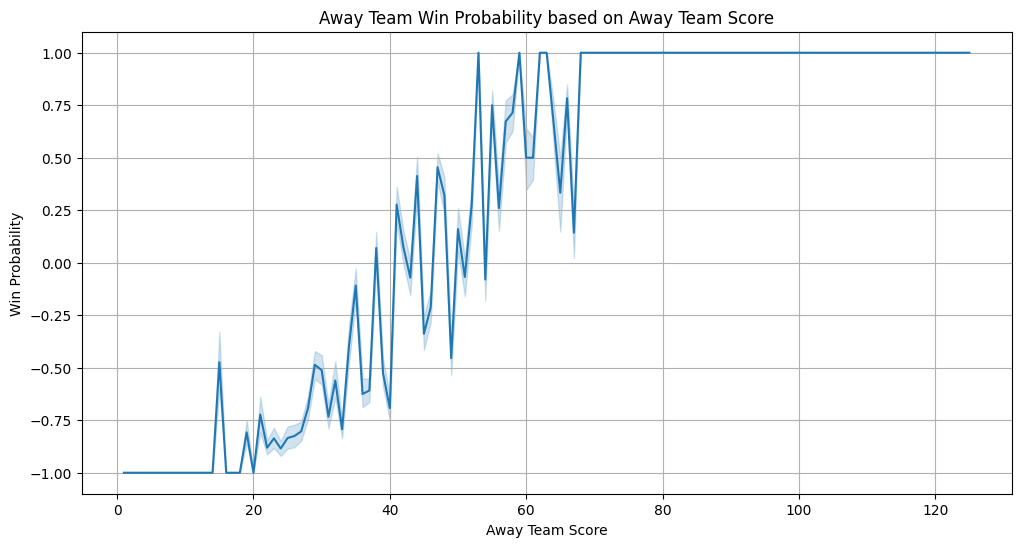

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot to show the trend of away team wins for different score ranges
plt.figure(figsize=(12, 6))
sns.lineplot(x='match_away_team_score', y='result', data=afl_data)
plt.title('Away Team Win Probability based on Away Team Score')
plt.xlabel('Away Team Score')
plt.ylabel('Win Probability')
plt.grid(True)
plt.show()


In [8]:
print(afl_data.dtypes)


Unnamed: 0           int64
venue_name          object
match_id             int64
match_home_team     object
match_away_team     object
                    ...   
score_launches     float64
shots_at_goal      float64
spoils             float64
subbed              object
player_position    float64
Length: 81, dtype: object


In [9]:
print(afl_data['match_date'].unique())
print(afl_data['match_away_team_score'].unique())
print(afl_data['match_home_team_score'].unique())


['1897-05-08T00:00:00.000000000' '1897-05-15T00:00:00.000000000'
 '1897-05-22T00:00:00.000000000' ... '1978-06-24T00:00:00.000000000'
 '1978-07-01T00:00:00.000000000' '1978-07-08T00:00:00.000000000']
[ 16  47  44  36  50  66  19  37  41   2  22  33  42  46  26  21  63  24
  35  15  27  43 114  53  57  73  74  18  10  64  30  71   3  25  28  45
  39  29  51  48   8  17  92  38   6  23  62  68  20  12  59  93   9  11
  32  13  75  54  69  56 103   7  52  70  31  78   5  61  94  58  84  40
  82   1  67  86  34  49  55  83  79  99  77 104  60  76  14  72  87 108
  97  65  81 118 125  80 100  89  88  95 120  91 107 101 117  98 163 119
  90 102 110 105 111  85  96 145 113 116 142 138 109 106 154 122 121 133
 112 135 137 123 126 132 127 115 124 130 131 128 141 143 129 144 134 166
 155 150 146 159 151 140 164 170 153 149 167 156 136 196 139 178 157 171
 152 168 148 161 147 158 175 189 204]
[ 49  41  24  27  40  30  26  64  39  78  59  44  20  76 107  37  72  33
  16  31  35  63  43   9  29  32

<ipython-input-11-659daa8c9334>:7: DtypeWarning: Columns (8,18,80) have mixed types. Specify dtype option on import or set low_memory=False.
  afl_data = pd.read_csv('/content/fryziggafl.csv')
<ipython-input-11-659daa8c9334>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afl_post_2000['result'] = np.sign(afl_post_2000['match_away_team_score'] - afl_post_2000['match_home_team_score'])


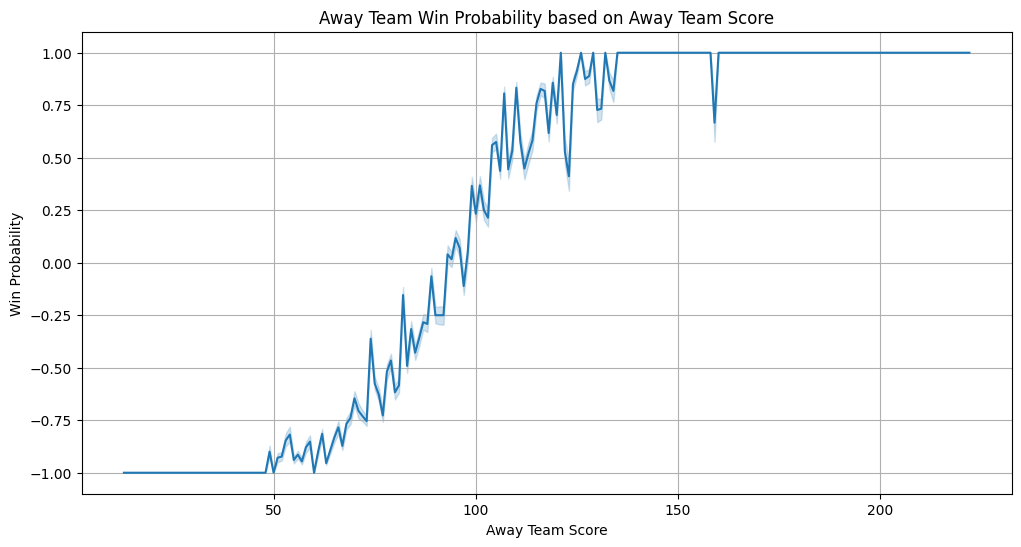

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the AFL match data into a pandas DataFrame
afl_data = pd.read_csv('/content/fryziggafl.csv')

# Convert 'match_date' to datetime format if it's not already in that format
afl_data['match_date'] = pd.to_datetime(afl_data['match_date'])

# Filter matches post-2000
afl_post_2000 = afl_data[afl_data['match_date'] > '2000-01-01']

# Create a new column 'result' indicating match outcome (1 for away team win, 0 for draw, -1 for away team loss)
afl_post_2000['result'] = np.sign(afl_post_2000['match_away_team_score'] - afl_post_2000['match_home_team_score'])

# Create a line plot to show the trend of away team wins for different score ranges
plt.figure(figsize=(12, 6))
sns.lineplot(x='match_away_team_score', y='result', data=afl_post_2000)
plt.title('Away Team Win Probability based on Away Team Score')
plt.xlabel('Away Team Score')
plt.ylabel('Win Probability')
plt.grid(True)
plt.show()


In [12]:
import pandas as pd
import folium
import requests, zipfile, io


In [13]:
australian_states = requests.get('https://raw.githubusercontent.com/tonywr71/GeoJson-Data/master/australian-states.json').json()


In [14]:
datapack_2021_zipped = requests.get('https://www.abs.gov.au/census/find-census-data/datapacks/download/2021_GCP_STE_for_AUS_short-header.zip')
datapack_2021 = zipfile.ZipFile(io.BytesIO(datapack_2021_zipped.content))
datapack_2021.extractall()


In [15]:
census_data = pd.read_csv('./2021 Census GCP States and Territories for AUS/2021Census_G01_AUST_STE.csv')


In [26]:
# Calculate male-to-female population ratio
census_data['Male_to_Female_Ratio'] = census_data['Tot_P_M'] / census_data['Tot_P_F']

# Create the choropleth map based on male-to-female population ratio
m_australia_ratio = folium.Map(location=(-23.07, 132.08), zoom_start=5)

folium.Choropleth(
    geo_data=australian_states,
    data=census_data,
    columns=["STE_CODE_2021", "Male_to_Female_Ratio"],
    key_on='feature.id',
    fill_color='YlGnBu',  # You can choose any color scale that you prefer
    legend_name='Male-to-Female Population Ratio',
    highlight=True
).add_to(m_australia_ratio)

# Display the map
m_australia_ratio


In [25]:
import pandas as pd
import networkx as nx
import shutil

from bokeh.io import output_notebook, show
from bokeh.models import Range1d, Circle, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

output_notebook()

# Download and extract Les Misérables data
!wget https://nrvis.com/download/data/misc/lesmis.zip
shutil.unpack_archive('lesmis.zip')

# Load the Les Misérables graph
G = nx.Graph()
with open('lesmis.mtx') as in_file:
    lines = in_file.readlines()[2:]
    for line in lines:
        n1, n2, w = line.split()
        G.add_edge(int(n1), int(n2), weight=int(w))

# Compute circular layout positions for the nodes
pos = nx.circular_layout(G)

# Create a Bokeh plot
title = 'Les Miserables Character Network'
plot = figure(tooltips=[("Character", "@index")], tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom', x_range=Range1d(-1.2, 1.2), y_range=Range1d(-1.2, 1.2), title=title)

# Create a network graph object with circular layout positions
network_graph = from_networkx(G, pos, edge_width='weight', scale=1, center=(0, 0))

# Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

# Set edge opacity
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5)

# Add network graph to the plot
plot.renderers.append(network_graph)

# Show the plot
show(plot)


--2023-10-28 14:58:41--  https://nrvis.com/download/data/misc/lesmis.zip
Resolving nrvis.com (nrvis.com)... 173.236.176.48
Connecting to nrvis.com (nrvis.com)|173.236.176.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1801 (1.8K) [application/zip]
Saving to: ‘lesmis.zip.8’

lesmis.zip.8        100%[===================>]   1.76K  --.-KB/s    in 0s      

2023-10-28 14:58:41 (190 MB/s) - ‘lesmis.zip.8’ saved [1801/1801]

